In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')
sys.path.append('../tools/')
import absorption_line_vel as vel
from absorption_line_vel import SpectrumSN_Lines, AbsorbLine

import pymc as pm
import arviz as az
import numpy as np

# read spec data
z = 0.0307
spec = '../../SN2020jgb/spectroscopy/SN2020jgb/ZTF20aayhacx_20200513_NOT_v4.ascii'
Spec1 = SpectrumSN_Lines(spec, z)

# Si II

<AxesSubplot:>

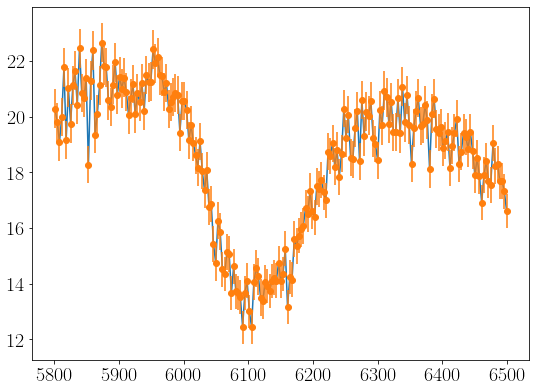

In [3]:
Spec1.plot_line_region(5800, 6500)

In [5]:
Spec1.add_line('SiII_6355', 5930, 6330, lines=[6371.359, 6347.103])
Spec1.line['SiII_6355'].LS_estimator()

LS estimation:
Velocity 1: -11888 km/s


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [blue_fl, red_fl, A, v_mean, ln_v_var, sigma_0]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 14 seconds.


                mean       sd    hdi_16%    hdi_84%  mcse_mean  mcse_sd  \
v_mean[0] -11865.561   90.536 -11969.620 -11789.953      1.859    1.315   
v_sig[0]    3329.733  117.608   3213.550   3443.712      3.238    2.290   
A[0]       -2613.595  127.300  -2744.110  -2498.545      3.640    2.575   
sigma_0        0.015    0.009      0.002      0.021      0.000    0.000   
EW_0          64.916    3.162     62.059     68.158      0.090    0.064   

           ess_bulk  ess_tail  r_hat  
v_mean[0]  2375.258  2403.413  1.001  
v_sig[0]   1323.255  1714.778  1.002  
A[0]       1226.635  1410.770  1.002  
sigma_0     881.790   628.984  1.006  
EW_0       1226.635  1410.770  1.002  


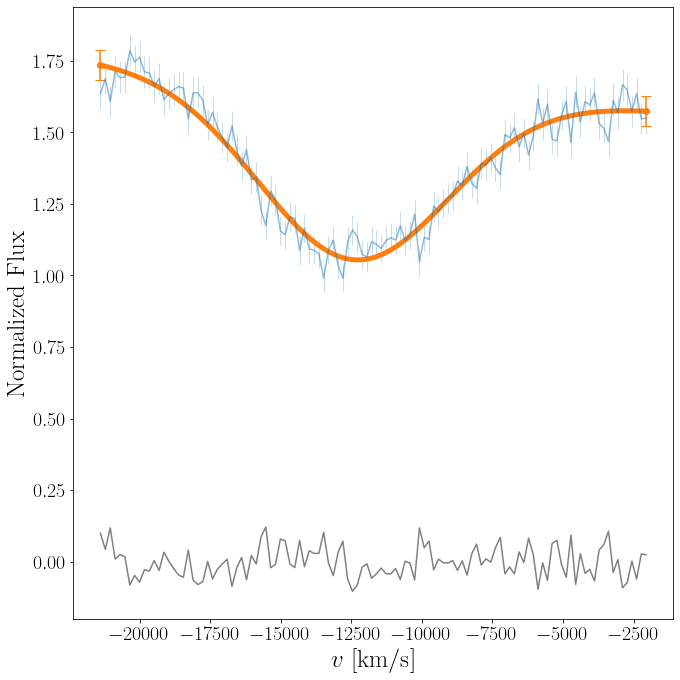

In [6]:
trace_SiII, Model_SiII = Spec1.line['SiII_6355'].MCMC_NUTS_sampler(
    vel_mean_mu=[-1e4], vel_mean_sig=[3e3])


# Ca II IRT

<AxesSubplot:>

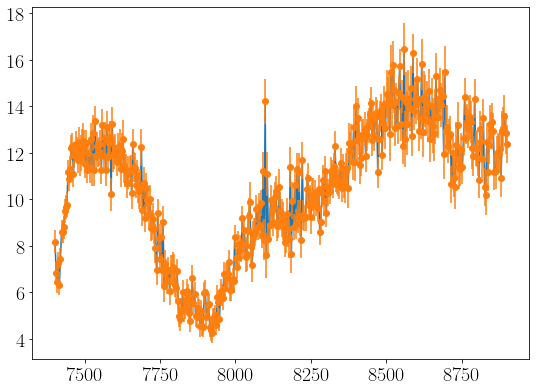

In [7]:
Spec1.plot_line_region(7400, 8900)

In [8]:
Spec1.add_line('CaII_IRT/CaII_IRT',
               7500,
               8650,
               lines=[[8498.018, 8542.089, 8662.140],
                      [8498.018, 8542.089, 8662.140]],
               rel_strength=[[], []])
Spec1.line['CaII_IRT/CaII_IRT'].LS_estimator(guess=(1, 1, -25000, 15, -1000,
                                                    -12000, 15, -1000))

LS estimation:
Velocity 1: -24505 km/s
Velocity 2: -11214 km/s


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [blue_fl, red_fl, A, v_mean, ln_v_var, sigma_0]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 20 seconds.


                mean       sd    hdi_16%    hdi_84%  mcse_mean  mcse_sd  \
v_mean[0] -24532.878  127.084 -24639.240 -24396.691      3.187    2.256   
v_mean[1] -11370.562  280.213 -11624.663 -11078.318      6.943    4.919   
v_sig[0]    4067.602  178.011   3906.935   4259.662      4.829    3.415   
v_sig[1]    3293.747  395.881   2868.871   3621.740     10.951    7.925   
A[0]       -2520.323   93.014  -2607.470  -2422.738      2.479    1.753   
A[1]       -1012.884   94.448  -1080.177   -908.270      2.627    1.896   
sigma_0        0.028    0.006      0.023      0.033      0.000    0.000   
EW_0         213.234    7.870    204.977    220.607      0.210    0.148   
EW_1          85.696    7.991     76.845     91.389      0.222    0.160   

           ess_bulk  ess_tail  r_hat  
v_mean[0]  1675.327  1697.444  1.001  
v_mean[1]  1635.721  2041.923  1.002  
v_sig[0]   1361.880  1966.442  1.003  
v_sig[1]   1423.271  1530.726  1.003  
A[0]       1411.928  2106.971  1.002  
A[1]       1435

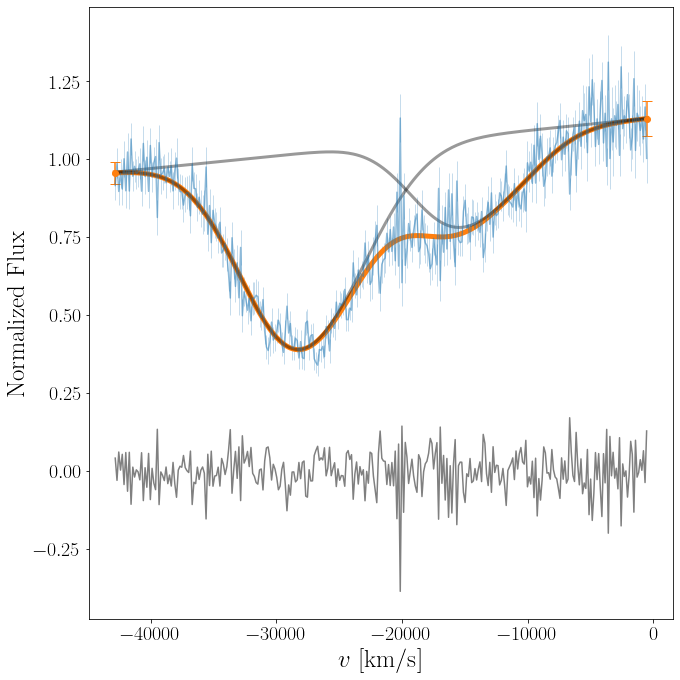

In [9]:
trace_CaII, Model_CaII = Spec1.line['CaII_IRT/CaII_IRT'].MCMC_NUTS_sampler(
    vel_mean_mu=[-2.5e4, -1.0e4],
    vel_mean_sig=[3e3, 3e3])

# He I

In [10]:
import sys
sys.path.append('..')
sys.path.append('../tools/')
import absorption_line_vel as vel
from absorption_line_vel import SpectrumSN_Lines, AbsorbLine

import pymc as pm
import arviz as az
import numpy as np

# read spec data
z = 0.0307
gnirs = '../../SN2020jgb/spectroscopy/SN2020jgb/ZTF20aayhacx_20200609_Gemini-N_v1.ascii'
gnirs1 = SpectrumSN_Lines(gnirs, z)

<AxesSubplot:>

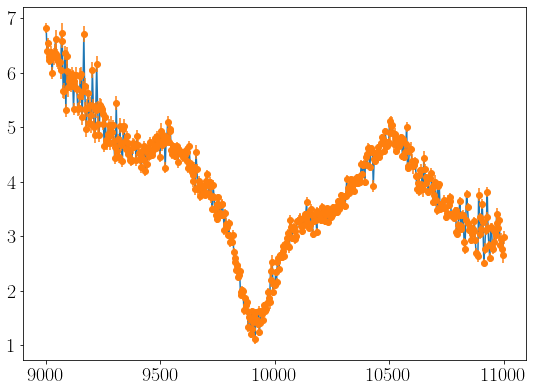

In [11]:
gnirs1.plot_line_region(9000, 11000)

In [12]:
gnirs1.add_line('HeI_10830/FeII2',
               9450,
               10550,
               lines=[[10830], [9998, 10500]],
               rel_strength=[[1], [.5, 1]],
               free_rel_strength=[False, True])
gnirs1.line['HeI_10830/FeII2'].LS_estimator(guess=(5, 5, -28000, 15, -2000,
                                                 -8000, 14, -2000))

LS estimation:
Velocity 1: -26405 km/s
Velocity 2: -8865 km/s


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [blue_fl, red_fl, A, v_mean, ln_v_var, log_ratio_1, sigma_0]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 19 seconds.


                 mean       sd    hdi_16%    hdi_84%  mcse_mean  mcse_sd  \
v_mean[0]  -26110.263   59.471 -26166.167 -26048.835      1.383    0.978   
v_mean[1]   -8405.273  123.164  -8510.132  -8265.375      2.941    2.085   
v_sig[0]     2836.002   48.123   2785.419   2881.430      1.022    0.723   
v_sig[1]     3371.667  115.606   3245.150   3472.825      2.833    2.013   
A[0]       -23994.721  405.306 -24389.965 -23585.747      9.132    6.458   
A[1]       -12820.133  611.846 -13404.662 -12218.642     15.411   10.992   
sigma_0         0.140    0.009      0.131      0.148      0.000    0.000   
ratio_1[0]      0.456    0.031      0.429      0.491      0.001    0.000   
EW_0          161.625    2.730    158.870    164.288      0.062    0.044   
EW_1          125.768    6.774    118.293    131.393      0.169    0.120   

            ess_bulk  ess_tail  r_hat  
v_mean[0]   1870.095  2030.464  1.001  
v_mean[1]   1786.957  2285.860  1.002  
v_sig[0]    2218.230  2640.828  1.001  
v_s

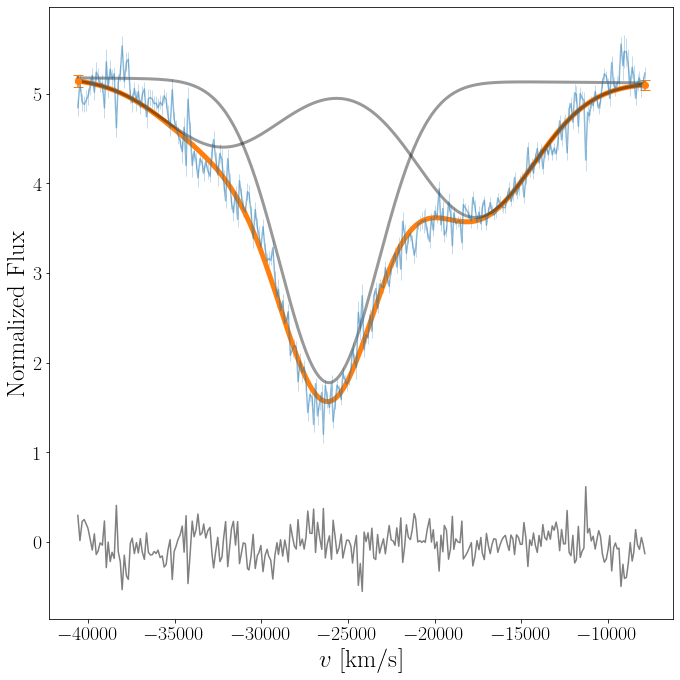

In [14]:
trace_HeI, Model_HeI = gnirs1.line['HeI_10830/FeII2'].MCMC_NUTS_sampler(
    vel_mean_mu=[-2.6e4, -1.0e4],
    vel_mean_sig=[3e3, 3e3])

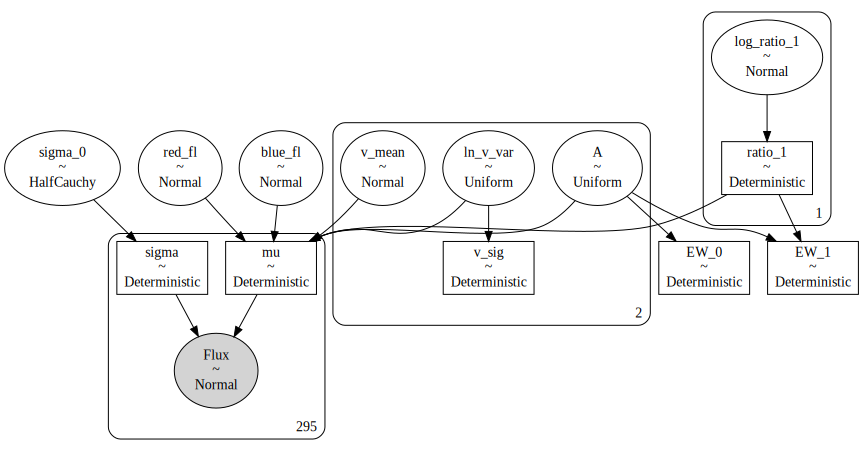

In [15]:
pm.model_to_graphviz(Model_HeI)